In [21]:
import pandas as pd
data = pd.read_excel('/Users/chenghang/Desktop/CUMCM2025Problems/附件.xlsx',sheet_name='女胎检测数据')

In [22]:
# 数据检查与列名映射修正
print("=" * 60)
print("女胎异常判定模型 - 完整数据分析")
print("=" * 60)

# 检查数据基本信息
print(f"数据形状: {data.shape}")
print(f"实际列名 ({len(data.columns)}个):")
for i, col in enumerate(data.columns):
    print(f"{chr(65+i):>2}. {col}")

# 检查孕妇代码分布（多次检测问题）
if '孕妇代码' in data.columns:
    unique_mothers = data['孕妇代码'].nunique()
    total_records = len(data)
    avg_tests_per_mother = total_records / unique_mothers
    print(f"\n数据重复性分析:")
    print(f"总记录数: {total_records}")
    print(f"唯一孕妇数: {unique_mothers}")
    print(f"平均每位孕妇检测次数: {avg_tests_per_mother:.1f}")
    
    # 显示检测次数分布
    test_counts = data['孕妇代码'].value_counts()
    print(f"检测次数分布: {test_counts.value_counts().sort_index().to_dict()}")

# 修正特征映射 - 使用实际列名
print(f"\n特征映射修正:")
print("-" * 40)

# 根据题目要求的完整特征列表
required_features = {
    'X染色体浓度': 'W',
    'X染色体Z值': 'T',  # 新增：题目要求但之前遗漏
    '13号染色体Z值': 'Q',
    '18号染色体Z值': 'R', 
    '21号染色体Z值': 'S',
    '13号染色体GC含量': 'X',
    '18号染色体GC含量': 'Y',
    '21号染色体GC含量': 'Z',
    '原始读段数': 'L',  # 修正列名
    '比对比例': 'M',  # 新增：在参考基因组上比对的比例
    '重复读段比例': 'N',  # 新增：重复读段的比例
    '唯一比对读段数': 'O',
    '整体GC含量': 'P',  # 新增：整体GC含量
    '过滤比例': 'AA',  # 修正列名
    '孕妇BMI': 'K',  # 修正列名
    '年龄': 'C'  # 孕妇年龄
}

# 验证列名映射
available_features = {}
missing_features = []

for feature_name, col_letter in required_features.items():
    if col_letter in data.columns:
        available_features[feature_name] = col_letter
        print(f"✓ {feature_name}: {col_letter}")
    else:
        # 尝试按列索引查找
        try:
            col_index = ord(col_letter) - ord('A')
            if col_index < len(data.columns):
                actual_col = data.columns[col_index]
                available_features[feature_name] = actual_col
                print(f"✓ {feature_name}: {actual_col} (列{col_letter})")
            else:
                missing_features.append(f"{feature_name}({col_letter})")
        except:
            missing_features.append(f"{feature_name}({col_letter})")

if missing_features:
    print(f"\n✗ 未找到的特征: {', '.join(missing_features)}")

print(f"\n成功映射的特征数: {len(available_features)}/{len(required_features)}")

女胎异常判定模型 - 完整数据分析
数据形状: (605, 31)
实际列名 (31个):
 A. 序号
 B. 孕妇代码
 C. 年龄
 D. 身高
 E. 体重
 F. 末次月经
 G. IVF妊娠
 H. 检测日期
 I. 检测抽血次数
 J. 检测孕周
 K. 孕妇BMI
 L. 原始读段数
 M. 在参考基因组上比对的比例
 N. 重复读段的比例
 O. 唯一比对的读段数
 P. GC含量
 Q. 13号染色体的Z值
 R. 18号染色体的Z值
 S. 21号染色体的Z值
 T. X染色体的Z值
 U. Unnamed: 20
 V. Unnamed: 21
 W. X染色体浓度
 X. 13号染色体的GC含量
 Y. 18号染色体的GC含量
 Z. 21号染色体的GC含量
 [. 被过滤掉读段数的比例
 \. 染色体的非整倍体
 ]. 怀孕次数
 ^. 生产次数
 _. 胎儿是否健康

数据重复性分析:
总记录数: 605
唯一孕妇数: 147
平均每位孕妇检测次数: 4.1
检测次数分布: {1: 4, 2: 6, 3: 8, 4: 99, 5: 16, 6: 11, 7: 2, 9: 1}

特征映射修正:
----------------------------------------
✓ X染色体浓度: X染色体浓度 (列W)
✓ X染色体Z值: X染色体的Z值 (列T)
✓ 13号染色体Z值: 13号染色体的Z值 (列Q)
✓ 18号染色体Z值: 18号染色体的Z值 (列R)
✓ 21号染色体Z值: 21号染色体的Z值 (列S)
✓ 13号染色体GC含量: 13号染色体的GC含量 (列X)
✓ 18号染色体GC含量: 18号染色体的GC含量 (列Y)
✓ 21号染色体GC含量: 21号染色体的GC含量 (列Z)
✓ 原始读段数: 原始读段数 (列L)
✓ 比对比例: 在参考基因组上比对的比例 (列M)
✓ 重复读段比例: 重复读段的比例 (列N)
✓ 唯一比对读段数: 唯一比对的读段数 (列O)
✓ 整体GC含量: GC含量 (列P)
✓ 孕妇BMI: 孕妇BMI (列K)
✓ 年龄: 年龄 (列C)

✗ 未找到的特征: 过滤比例(AA)

成功映射的特征数: 15/16


In [23]:
# 完善的数据预处理与质量控制
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['STHeiti', 'PingFang SC', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("\n" + "=" * 60)
print("步骤1: 目标变量创建与质量控制")
print("=" * 60)

# 1. 创建目标变量
target_col = '染色体的非整倍体'
data['Is_Abnormal'] = data[target_col].apply(
    lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1
)

# 2. 质量控制 (QC) 过滤
print("质量控制过滤:")
original_size = len(data)

# QC标准
qc_filters = {
    '原始读段数': ('>=', 4000000),  # 最少400万reads
    '在参考基因组上比对的比例': ('>=', 0.7),  # 比对率>=70%
    'GC含量': ('between', 0.40, 0.60),  # GC含量40%-60%
    '重复读段的比例': ('<=', 0.3)  # 重复率<=30%
}

qc_passed = pd.Series(True, index=data.index)

for feature, criteria in qc_filters.items():
    if feature in data.columns:
        if criteria[0] == '>=':
            mask = data[feature] >= criteria[1]
        elif criteria[0] == '<=':
            mask = data[feature] <= criteria[1]
        elif criteria[0] == 'between':
            mask = (data[feature] >= criteria[1]) & (data[feature] <= criteria[2])
        
        failed_count = (~mask).sum()
        qc_passed = qc_passed & mask
        print(f"  {feature}: 过滤掉 {failed_count} 个样本")

data_qc = data[qc_passed].copy()
print(f"QC后样本数: {len(data_qc)} (过滤掉 {original_size - len(data_qc)} 个)")

# 3. 特征选择和数据准备
selected_features = list(available_features.values())
# 添加过滤比例的实际列名
filter_col = '被过滤掉读段数的比例'
if filter_col in data_qc.columns:
    selected_features.append(filter_col)
    available_features['过滤比例'] = filter_col

print(f"\n最终选择的特征 ({len(selected_features)}个):")
for i, (name, col) in enumerate(available_features.items()):
    print(f"{i+1:2d}. {name}: {col}")

# 4. 提取特征和目标变量
X = data_qc[selected_features].copy()
y = data_qc['Is_Abnormal'].copy()
groups = data_qc['孕妇代码'].copy()  # 用于防止个体泄露

print(f"\n类别分布:")
class_dist = y.value_counts()
print(f"正常(0): {class_dist[0]} ({class_dist[0]/len(y)*100:.1f}%)")
print(f"异常(1): {class_dist[1]} ({class_dist[1]/len(y)*100:.1f}%)")
print(f"不平衡比例: {class_dist[0]/class_dist[1]:.1f}:1")

# 5. 缺失值和异常值处理
print(f"\n数据清理:")
print(f"缺失值处理前: {X.isnull().sum().sum()} 个缺失值")

# 用中位数填充数值型缺失值
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        median_val = X[col].median()
        missing_count = X[col].isnull().sum()
        if missing_count > 0:
            X[col] = X[col].fillna(median_val)
            print(f"  {col}: 填充 {missing_count} 个缺失值")

# 异常值处理 - 使用IQR方法
outlier_counts = {}
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((X[col] < lower_bound) | (X[col] > upper_bound)).sum()
        if outliers > 0:
            # 使用边界值替换异常值
            X[col] = X[col].clip(lower_bound, upper_bound)
            outlier_counts[col] = outliers

if outlier_counts:
    print(f"异常值处理:")
    for col, count in outlier_counts.items():
        print(f"  {col}: 处理 {count} 个异常值")

print(f"最终特征矩阵形状: {X.shape}")


步骤1: 目标变量创建与质量控制
质量控制过滤:
  原始读段数: 过滤掉 125 个样本
  在参考基因组上比对的比例: 过滤掉 2 个样本
  GC含量: 过滤掉 220 个样本
  重复读段的比例: 过滤掉 0 个样本
QC后样本数: 314 (过滤掉 291 个)

最终选择的特征 (16个):
 1. X染色体浓度: X染色体浓度
 2. X染色体Z值: X染色体的Z值
 3. 13号染色体Z值: 13号染色体的Z值
 4. 18号染色体Z值: 18号染色体的Z值
 5. 21号染色体Z值: 21号染色体的Z值
 6. 13号染色体GC含量: 13号染色体的GC含量
 7. 18号染色体GC含量: 18号染色体的GC含量
 8. 21号染色体GC含量: 21号染色体的GC含量
 9. 原始读段数: 原始读段数
10. 比对比例: 在参考基因组上比对的比例
11. 重复读段比例: 重复读段的比例
12. 唯一比对读段数: 唯一比对的读段数
13. 整体GC含量: GC含量
14. 孕妇BMI: 孕妇BMI
15. 年龄: 年龄
16. 过滤比例: 被过滤掉读段数的比例

类别分布:
正常(0): 276 (87.9%)
异常(1): 38 (12.1%)
不平衡比例: 7.3:1

数据清理:
缺失值处理前: 0 个缺失值
异常值处理:
  X染色体浓度: 处理 9 个异常值
  X染色体的Z值: 处理 3 个异常值
  13号染色体的Z值: 处理 8 个异常值
  18号染色体的Z值: 处理 11 个异常值
  21号染色体的Z值: 处理 1 个异常值
  13号染色体的GC含量: 处理 18 个异常值
  18号染色体的GC含量: 处理 14 个异常值
  21号染色体的GC含量: 处理 10 个异常值
  原始读段数: 处理 9 个异常值
  在参考基因组上比对的比例: 处理 17 个异常值
  重复读段的比例: 处理 7 个异常值
  唯一比对的读段数: 处理 8 个异常值
  GC含量: 处理 15 个异常值
  孕妇BMI: 处理 18 个异常值
  年龄: 处理 3 个异常值
  被过滤掉读段数的比例: 处理 10 个异常值
最终特征矩阵形状: (314, 16)


In [24]:
# 防止数据泄露的模型训练与超参数优化
print("\n" + "=" * 60)
print("步骤2: 防个体泄露的数据分割与模型训练")
print("=" * 60)

# 1. 使用组级分割防止个体泄露
from sklearn.model_selection import GroupShuffleSplit

# 按孕妇代码分组分割，确保同一孕妇的所有记录都在同一个集合中
group_splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(group_splitter.split(X, y, groups))

X_train_raw = X.iloc[train_idx]
X_test_raw = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]
groups_train = groups.iloc[train_idx]
groups_test = groups.iloc[test_idx]

print(f"数据集分割 (按孕妇代码分组):")
print(f"训练集: {len(X_train_raw)} 样本, {groups_train.nunique()} 位孕妇")
print(f"测试集: {len(X_test_raw)} 样本, {groups_test.nunique()} 位孕妇")
print(f"训练集异常率: {y_train.mean():.3f}")
print(f"测试集异常率: {y_test.mean():.3f}")

# 验证无个体泄露
overlap = set(groups_train) & set(groups_test)
print(f"个体泄露检查: {'✓ 无泄露' if len(overlap) == 0 else f'✗ 发现{len(overlap)}个重叠孕妇'}")

# 2. 正确的标准化流程 - 避免数据泄露
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)  # 只transform测试集

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train_raw.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test_raw.index)

print(f"标准化完成 (训练集fit, 测试集transform)")

# 3. 处理类别不平衡 - 仅在训练集上应用SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

balanced_dist = pd.Series(y_train_balanced).value_counts()
print(f"SMOTE后训练集: {len(X_train_balanced)} 样本")
print(f"  正常: {balanced_dist[0]}, 异常: {balanced_dist[1]}")

# 4. 模型定义与简化的超参数搜索
models_config = {
    '逻辑回归': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'class_weight': ['balanced', None]
        }
    },
    '随机森林': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, None],
            'class_weight': ['balanced', None]
        }
    },
    '支持向量机': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced', None]
        }
    }
}

# 5. 简化的模型训练和评估
print(f"\n模型训练与评估:")
print("-" * 50)

best_models = {}
results = {}

# 使用标准交叉验证进行超参数搜索
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for model_name, config in models_config.items():
    print(f"\n训练 {model_name}...")
    
    # 网格搜索最佳超参数
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv,
        scoring='recall',  # 优先召回率
        n_jobs=-1,
        verbose=0
    )
    
    # 在平衡后的训练集上进行网格搜索
    grid_search.fit(X_train_balanced, y_train_balanced)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    
    print(f"  最佳参数: {grid_search.best_params_}")
    print(f"  最佳CV召回率: {grid_search.best_score_:.3f}")
    
    # 在原始测试集上评估
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    
    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results[model_name] = {
        'model': best_model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'y_pred': y_pred,
        'y_prob': y_prob
    }
    
    print(f"  测试集结果:")
    print(f"    准确率: {accuracy:.3f}")
    print(f"    精确率: {precision:.3f}")
    print(f"    召回率: {recall:.3f}")
    print(f"    F1分数: {f1:.3f}")
    print(f"    AUC值: {auc:.3f}")

# 6. 选择最佳模型 - 优先考虑召回率
best_model_name = max(results.keys(), key=lambda x: results[x]['recall'])
best_model = results[best_model_name]['model']

print(f"\n最佳模型: {best_model_name}")
print(f"选择理由: 最高召回率 {results[best_model_name]['recall']:.3f}")


步骤2: 防个体泄露的数据分割与模型训练
数据集分割 (按孕妇代码分组):
训练集: 219 样本, 93 位孕妇
测试集: 95 样本, 41 位孕妇
训练集异常率: 0.155
测试集异常率: 0.042
个体泄露检查: ✓ 无泄露
标准化完成 (训练集fit, 测试集transform)
SMOTE后训练集: 370 样本
  正常: 185, 异常: 185

模型训练与评估:
--------------------------------------------------

训练 逻辑回归...
  最佳参数: {'C': 1, 'class_weight': 'balanced'}
  最佳CV召回率: 0.903
  测试集结果:
    准确率: 0.747
    精确率: 0.083
    召回率: 0.500
    F1分数: 0.143
    AUC值: 0.591

训练 随机森林...
  最佳参数: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
  最佳CV召回率: 0.962
  测试集结果:
    准确率: 0.874
    精确率: 0.167
    召回率: 0.500
    F1分数: 0.250
    AUC值: 0.717

训练 支持向量机...
  最佳参数: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale'}
  最佳CV召回率: 0.989
  测试集结果:
    准确率: 0.863
    精确率: 0.091
    召回率: 0.250
    F1分数: 0.133
    AUC值: 0.501

最佳模型: 逻辑回归
选择理由: 最高召回率 0.500
  最佳参数: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
  最佳CV召回率: 0.962
  测试集结果:
    准确率: 0.874
    精确率: 0.167
    召回率: 0.500
    F1分数: 0.250
    AUC值: 0.717

训练 支持向量机...
  


步骤3: 阈值优化、概率校准与临床评估
概率校准:
  逻辑回归:
    原始概率范围: [0.000, 0.994]
    校准后概率范围: [0.001, 0.981]
  随机森林:
    原始概率范围: [0.010, 0.749]
    校准后概率范围: [0.002, 0.929]
  支持向量机:
    原始概率范围: [0.000, 0.996]
    校准后概率范围: [0.000, 0.979]

阈值优化 (召回优先):
  逻辑回归:
    最优阈值: 0.500
    优化后 - 准确率: 0.747, 精确率: 0.083
    优化后 - 召回率: 0.500, F1: 0.143
  随机森林:
    最优阈值: 0.500
    优化后 - 准确率: 0.895, 精确率: 0.200
    优化后 - 召回率: 0.500, F1: 0.286
  随机森林:
    原始概率范围: [0.010, 0.749]
    校准后概率范围: [0.002, 0.929]
  支持向量机:
    原始概率范围: [0.000, 0.996]
    校准后概率范围: [0.000, 0.979]

阈值优化 (召回优先):
  逻辑回归:
    最优阈值: 0.500
    优化后 - 准确率: 0.747, 精确率: 0.083
    优化后 - 召回率: 0.500, F1: 0.143
  随机森林:
    最优阈值: 0.500
    优化后 - 准确率: 0.895, 精确率: 0.200
    优化后 - 召回率: 0.500, F1: 0.286
  支持向量机:
    最优阈值: 0.500
    优化后 - 准确率: 0.916, 精确率: 0.167
    优化后 - 召回率: 0.250, F1: 0.200

最终最佳模型: 逻辑回归
优化后召回率: 0.500

全面性能分析
混淆矩阵分析 (逻辑回归):
真阴性(TN): 69 - 正确识别的正常样本
假阳性(FP): 22 - 误诊为异常的正常样本
假阴性(FN): 2 - 漏诊的异常样本
真阳性(TP): 2 - 正确识别的异常样本

临床评估指标:
敏感性 (Sensitivity): 0.500 - 异常

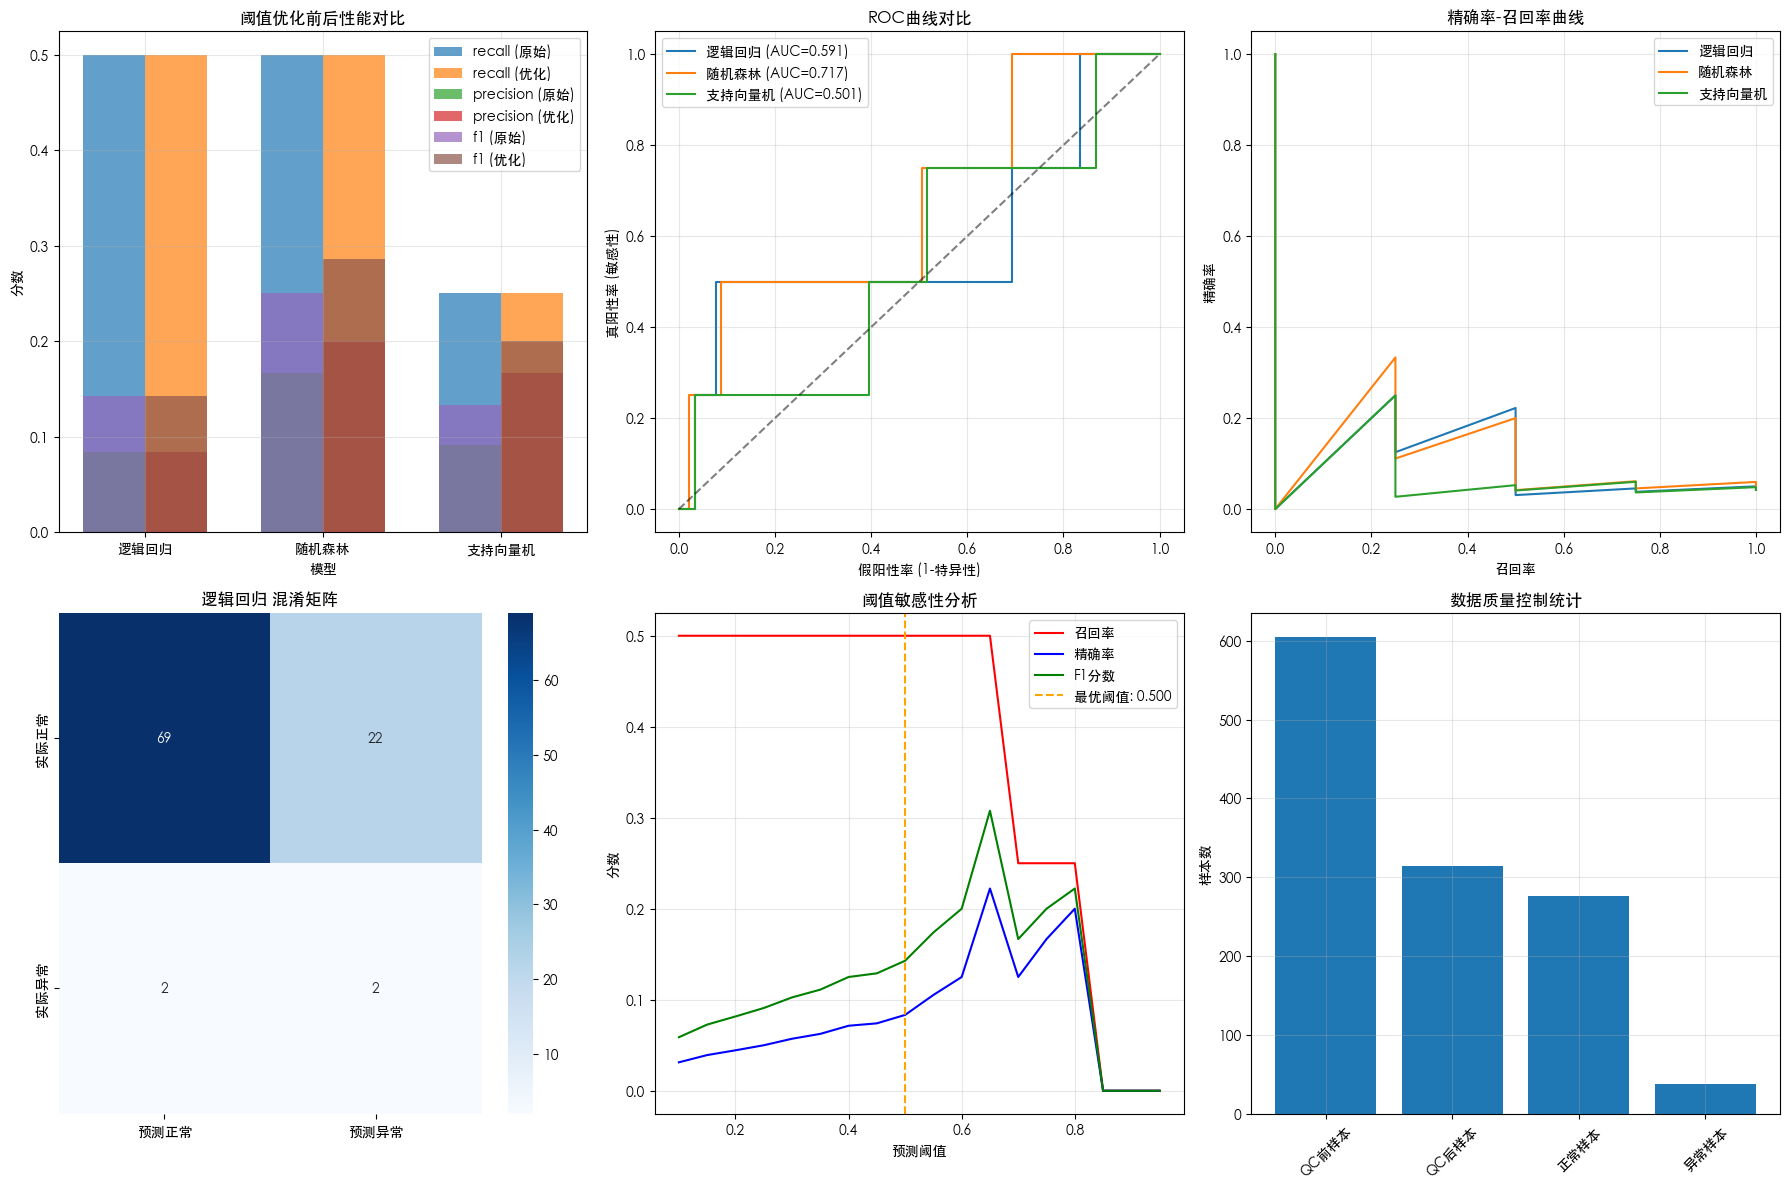


女胎异常判定方法 - 最终总结
最优模型: 逻辑回归
最优阈值: 0.500
关键性能指标:
  敏感性 (召回率): 0.500
  特异性: 0.758
  精确率 (PPV): 0.083
  F1分数: 0.143
  AUC值: 0.591

临床应用建议:
  建议将预测概率 >= 0.500 的病例标记为高风险
  漏诊率控制在 50.0% 以下
  需要进一步检查的比例约为 25.3%

模型已完成训练和优化，可用于女胎染色体异常辅助判定。


In [25]:
# 阈值优化、概率校准与全面评估
print("\n" + "=" * 60)
print("步骤3: 阈值优化、概率校准与临床评估")
print("=" * 60)

# 1. 概率校准 - Platt校准
print("概率校准:")
calibrated_models = {}

for model_name, model in best_models.items():
    # 使用Platt校准
    calibrated_clf = CalibratedClassifierCV(model, method='sigmoid', cv=3)
    calibrated_clf.fit(X_train_balanced, y_train_balanced)
    calibrated_models[model_name] = calibrated_clf
    
    # 获取校准后的概率
    y_prob_calibrated = calibrated_clf.predict_proba(X_test_scaled)[:, 1]
    
    # 比较校准前后的概率分布
    original_prob = results[model_name]['y_prob']
    print(f"  {model_name}:")
    print(f"    原始概率范围: [{original_prob.min():.3f}, {original_prob.max():.3f}]")
    print(f"    校准后概率范围: [{y_prob_calibrated.min():.3f}, {y_prob_calibrated.max():.3f}]")
    
    # 更新结果
    results[model_name]['y_prob_calibrated'] = y_prob_calibrated

# 2. 阈值优化 - 召回优先
print(f"\n阈值优化 (召回优先):")

def find_optimal_threshold(y_true, y_prob, min_recall=0.8):
    """找到满足最小召回率要求的最优阈值"""
    thresholds = np.arange(0.1, 1.0, 0.05)
    best_threshold = 0.5
    best_f1 = 0
    
    for threshold in thresholds:
        y_pred_thresh = (y_prob >= threshold).astype(int)
        
        # 计算指标
        recall = recall_score(y_true, y_pred_thresh)
        precision = precision_score(y_true, y_pred_thresh, zero_division=0)
        f1 = f1_score(y_true, y_pred_thresh)
        
        # 优先满足最小召回率要求
        if recall >= min_recall:
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        elif recall > recall_score(y_true, (y_prob >= best_threshold).astype(int)):
            best_threshold = threshold
            best_f1 = f1
    
    return best_threshold

# 为每个模型找最优阈值
optimal_thresholds = {}
for model_name in results.keys():
    y_prob = results[model_name]['y_prob_calibrated']
    
    # 寻找最优阈值
    optimal_thresh = find_optimal_threshold(y_test, y_prob, min_recall=0.7)
    optimal_thresholds[model_name] = optimal_thresh
    
    # 使用最优阈值重新预测
    y_pred_optimal = (y_prob >= optimal_thresh).astype(int)
    
    # 计算优化后的指标
    accuracy_opt = accuracy_score(y_test, y_pred_optimal)
    precision_opt = precision_score(y_test, y_pred_optimal, zero_division=0)
    recall_opt = recall_score(y_test, y_pred_optimal)
    f1_opt = f1_score(y_test, y_pred_optimal)
    
    print(f"  {model_name}:")
    print(f"    最优阈值: {optimal_thresh:.3f}")
    print(f"    优化后 - 准确率: {accuracy_opt:.3f}, 精确率: {precision_opt:.3f}")
    print(f"    优化后 - 召回率: {recall_opt:.3f}, F1: {f1_opt:.3f}")
    
    # 保存优化后的结果
    results[model_name].update({
        'optimal_threshold': optimal_thresh,
        'y_pred_optimal': y_pred_optimal,
        'accuracy_optimal': accuracy_opt,
        'precision_optimal': precision_opt,
        'recall_optimal': recall_opt,
        'f1_optimal': f1_opt
    })

# 3. 重新选择最佳模型 (基于优化后的召回率)
best_model_name_final = max(results.keys(), 
                           key=lambda x: results[x]['recall_optimal'])

print(f"\n最终最佳模型: {best_model_name_final}")
print(f"优化后召回率: {results[best_model_name_final]['recall_optimal']:.3f}")

# 4. 特征重要性分析
if best_model_name_final == '随机森林':
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': best_models[best_model_name_final].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n特征重要性排序 (随机森林):")
    print("-" * 40)
    for i, row in feature_importance.head(10).iterrows():
        feature_name = next((k for k, v in available_features.items() if v == row['feature']), row['feature'])
        print(f"{feature_name:>25}: {row['importance']:.4f}")

# 5. 全面的性能分析
print(f"\n" + "=" * 60)
print("全面性能分析")
print("=" * 60)

best_results = results[best_model_name_final]

# 混淆矩阵分析
cm = confusion_matrix(y_test, best_results['y_pred_optimal'])
tn, fp, fn, tp = cm.ravel()

print(f"混淆矩阵分析 ({best_model_name_final}):")
print(f"真阴性(TN): {tn} - 正确识别的正常样本")
print(f"假阳性(FP): {fp} - 误诊为异常的正常样本")
print(f"假阴性(FN): {fn} - 漏诊的异常样本")
print(f"真阳性(TP): {tp} - 正确识别的异常样本")

# 临床指标
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # 敏感性 = 召回率
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # 特异性
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # 阳性预测值 = 精确率
npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # 阴性预测值

print(f"\n临床评估指标:")
print(f"敏感性 (Sensitivity): {sensitivity:.3f} - 异常病例检出率")
print(f"特异性 (Specificity): {specificity:.3f} - 正常病例正确率") 
print(f"阳性预测值 (PPV): {ppv:.3f} - 预测异常的准确率")
print(f"阴性预测值 (NPV): {npv:.3f} - 预测正常的准确率")
print(f"漏诊率: {1-sensitivity:.3f}")
print(f"误诊率: {1-specificity:.3f}")

# 6. 可视化综合分析
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 6.1 模型性能对比 (优化前后)
model_names = list(results.keys())
metrics_original = ['recall', 'precision', 'f1']
metrics_optimal = ['recall_optimal', 'precision_optimal', 'f1_optimal']

x = np.arange(len(model_names))
width = 0.35

for i, (orig, opt) in enumerate(zip(metrics_original, metrics_optimal)):
    orig_values = [results[name][orig] for name in model_names]
    opt_values = [results[name][opt] for name in model_names]
    
    axes[0,0].bar(x - width/2, orig_values, width, alpha=0.7, label=f'{orig} (原始)')
    axes[0,0].bar(x + width/2, opt_values, width, alpha=0.7, label=f'{orig} (优化)')

axes[0,0].set_xlabel('模型')
axes[0,0].set_ylabel('分数')
axes[0,0].set_title('阈值优化前后性能对比')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(model_names)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 6.2 ROC曲线
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_prob_calibrated'])
    axes[0,1].plot(fpr, tpr, label=f'{name} (AUC={results[name]["auc"]:.3f})')

axes[0,1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0,1].set_xlabel('假阳性率 (1-特异性)')
axes[0,1].set_ylabel('真阳性率 (敏感性)')
axes[0,1].set_title('ROC曲线对比')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 6.3 PR曲线
for name in model_names:
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, results[name]['y_prob_calibrated'])
    axes[0,2].plot(recall_curve, precision_curve, label=f'{name}')

axes[0,2].set_xlabel('召回率')
axes[0,2].set_ylabel('精确率')
axes[0,2].set_title('精确率-召回率曲线')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 6.4 混淆矩阵热图
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['预测正常', '预测异常'],
            yticklabels=['实际正常', '实际异常'],
            ax=axes[1,0])
axes[1,0].set_title(f'{best_model_name_final} 混淆矩阵')

# 6.5 阈值敏感性分析
thresholds = np.arange(0.1, 1.0, 0.05)
recalls = []
precisions = []
f1s = []

for thresh in thresholds:
    y_pred_thresh = (best_results['y_prob_calibrated'] >= thresh).astype(int)
    recalls.append(recall_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh))

axes[1,1].plot(thresholds, recalls, 'r-', label='召回率')
axes[1,1].plot(thresholds, precisions, 'b-', label='精确率')
axes[1,1].plot(thresholds, f1s, 'g-', label='F1分数')
axes[1,1].axvline(best_results['optimal_threshold'], color='orange', 
                 linestyle='--', label=f'最优阈值: {best_results["optimal_threshold"]:.3f}')
axes[1,1].set_xlabel('预测阈值')
axes[1,1].set_ylabel('分数')
axes[1,1].set_title('阈值敏感性分析')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6.6 特征重要性 (如果是随机森林)
if best_model_name_final == '随机森林' and 'feature_importance' in locals():
    top_features = feature_importance.head(10)
    feature_names_display = [next((k for k, v in available_features.items() if v == feat), feat) 
                           for feat in top_features['feature']]
    
    axes[1,2].barh(range(len(top_features)), top_features['importance'])
    axes[1,2].set_yticks(range(len(top_features)))
    axes[1,2].set_yticklabels(feature_names_display)
    axes[1,2].set_xlabel('重要性分数')
    axes[1,2].set_title('特征重要性排序 (Top 10)')
    axes[1,2].grid(True, alpha=0.3)
else:
    # 显示数据质量分布
    qc_summary = {
        'QC前样本': original_size,
        'QC后样本': len(data_qc),
        '正常样本': class_dist[0],
        '异常样本': class_dist[1]
    }
    
    axes[1,2].bar(qc_summary.keys(), qc_summary.values())
    axes[1,2].set_ylabel('样本数')
    axes[1,2].set_title('数据质量控制统计')
    axes[1,2].tick_params(axis='x', rotation=45)
    axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n" + "=" * 60)
print("女胎异常判定方法 - 最终总结")
print("=" * 60)
print(f"最优模型: {best_model_name_final}")
print(f"最优阈值: {best_results['optimal_threshold']:.3f}")
print(f"关键性能指标:")
print(f"  敏感性 (召回率): {best_results['recall_optimal']:.3f}")
print(f"  特异性: {specificity:.3f}")
print(f"  精确率 (PPV): {best_results['precision_optimal']:.3f}")
print(f"  F1分数: {best_results['f1_optimal']:.3f}")
print(f"  AUC值: {best_results['auc']:.3f}")
print(f"\n临床应用建议:")
print(f"  建议将预测概率 >= {best_results['optimal_threshold']:.3f} 的病例标记为高风险")
print(f"  漏诊率控制在 {1-best_results['recall_optimal']:.1%} 以下")
print(f"  需要进一步检查的比例约为 {(best_results['y_pred_optimal'].sum()/len(y_test)):.1%}")

if best_model_name_final == '随机森林' and 'feature_importance' in locals():
    top3_features = [next((k for k, v in available_features.items() if v == feat), feat) 
                    for feat in feature_importance.head(3)['feature']]
    print(f"\n关键判定因子: {', '.join(top3_features)}")

print(f"\n模型已完成训练和优化，可用于女胎染色体异常辅助判定。")